<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 5: *Naive Bayes* & *KNN***

###**Tenggat Waktu: 8 November 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpaulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 8 November 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa yang mengerjakan lab menggunakan jawaban chatgpt tidak akan dinilai dan otomatis mendapat nilai 0

# **Pertanyataan Integritas**

In [4]:
# Isi dengan data diri Anda
NAMA = "Alden Luthfi"
KELAS = "A"
NPM = "2206028932"
USERNAME_KAGGLE = "aldenluthfi"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [5]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alden Luthfi dari kelas A dengan NPM 2206028932, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alden Luthfi)


# Naive Bayes

## A. Pengenalan Naive Bayes

Tugas Anda kali ini adalah mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.

 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (A? B? AB? atau O?) berdasarkan sifat karakter seseorang (arogan? perhatian? teliti? cerdas? sabar?). Anda akan membentuk sebuah kuesioner kepribadian dan memberikan kuesioner tersebut ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Lulu mengatakan kepada Anda bahwa dia adalah orang yang perhatian, cerdas, teliti, dan sabar. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Lulu?.

Salah satu cara untuk memprediksi golongan darah Kak Lulu adalah dengan menggunakan teorema Naive Bayes. Jika saya ingin menghitung peluang golongan darah Kak Lulu adalah O karena diketahui Kak Lulu adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Bayes Rule yang ditunjukkan di bawah ini.


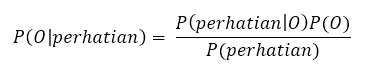

**Notes : dalam materi pengenalan naive bayes ini, lambang " = " berarti proportional to " ∝ "**

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung P(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh P(perhatian). Sama halnya, p(A | perhatian), P(B | perhatian), dan P(AB | perhatian) juga dibagi dengan P(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


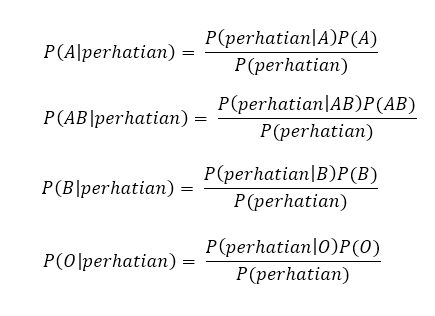

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (P(perhatian)) dicoret? Sehingga kita tidak perlu untuk menghitung nilai dari P(perhatian).

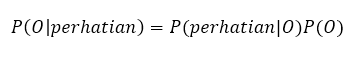

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O bila hanya faktor bahwa Kak Lulu itu perhatian diperhitungkan. Bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematika, kita bisa menggunakan rumus chain rule untuk
memperhitungkan faktor lain tersebut seperti yang diperlihatkan pada rumus di bawah ini.


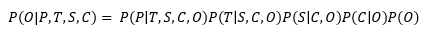

Keterangan :
*   T: teliti
*   C: cerdas
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Untungnya, dalam konteks Naive Bayes Classifier, kita dapat mengasumsikan bahwa faktor seperti
teliti, cerdas, dan sebagainya adalah faktor independen yang tidak terpengaruh oleh variabel yang
lain. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

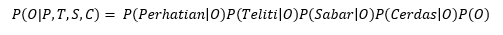

## B. Pengenalan Naive Bayes Dalam Sckitlearn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini mengasumsikan bahwa class conditional density (distribusi fitur untuk masing-masing kelas) mengikuti distribusi Gaussian (distribusi kontinu).
Model ini cocok digunakan untuk  data numerik yang mengikuti distribusi gaussian dan kontinu.

- Multinomial Naive Bayes,
Asumsi data yang digunakan bahwa class conditional density mengikuti distribusi multinomial.
Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Distribusi ini generalisasi dari distribusi Binomial, tapi untuk data dengan kategori lebih dari 2. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced.
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentais modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. Hands-on Naive Bayes

Dataset example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting pada bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [6]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [7]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Delivery No
Timely       46
Premature    17
Latecomer    17
Name: count, dtype: int64 

No. of unique values in column Blood of Pressure:
Blood of Pressure
Normal    40
High      20
Low       20
Name: count, dtype: int64 

No. of unique values in column Heart Problem:
Heart Problem
apt      50
inept    30
Name: count, dtype: int64 

No. of unique values in column Caesarian:
Caesarian
Yes    46
No     34
Name: count, dtype: int64 



### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding
* Vector encoding
* dan lain-lain.


Teknik-teknik transformasi, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait kelebihan dan kekurangan ketiga teknik tersebut). Pada sesi tutorial ini, kita akan menggunakan teknik one hot encoding. <br><br>
Referensi apa itu one-hot encoding : <br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [8]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian,drop_first=True)
df_dummy.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,False,True,False,False,False,False
1,26,False,True,False,True,False,True
2,26,True,False,False,True,False,False
3,28,False,True,False,False,False,False
4,22,False,True,False,True,False,True


In [9]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept
0,22,False,True,False,False,False
1,26,False,True,False,True,False
2,26,True,False,False,True,False
3,28,False,True,False,False,False
4,22,False,True,False,True,False


In [10]:
# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Caesarian_Yes, dtype: bool

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [11]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [12]:
# Melakukan pengaturan untuk metode K-Fold Cross Validation, yang merupakan teknik untuk mengevaluasi performa model
# dengan membagi data menjadi beberapa subset (atau fold)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes, mengevaluasi hasil kfold, dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [13]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [14]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [15]:
# Prediksi data test
y_pred = modelnb.predict(x_test)
y_pred

array([ True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [16]:
# Array data test
np.array(y_test)

array([False,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False])

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [17]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [18]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       False       0.55      0.67      0.60         9
        True       0.40      0.29      0.33         7

    accuracy                           0.50        16
   macro avg       0.47      0.48      0.47        16
weighted avg       0.48      0.50      0.48        16



Confusion Matrix



prediction,False,True
actual,,
False,6,3
True,5,2




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5
F1 Macro Average: 0.4666666666666667
F1 Micro Average: 0.5
Precision Macro Average: 0.4727272727272727
Precision Micro Average: 0.5
Recall Macro Average: 0.47619047619047616
Recall Micro Average: 0.5



Berdasarkan report diatas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik. Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak balance <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma naive bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# KNN (K-Nearest Neighbors)

## A. Pengenalan KNN

Sesuai dengan namanya (<i>nearest neighbors</i>), algoritma ini mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang lainnya. Contoh, kamu mempunyai dataset yang berisi informasi rumah dengan label rumah mewah dan rumah tidak mewah. KNN akan menyimpan informasi mengenai ukuran yang serupa, seperti kemiripan luas rumah dan juga harga rumah. Ketika data rumah baru masuk, KNN akan mengecek kesamaan informasi data rumah tersebut terhadap data lama yang telah dipelajari KNN. Hasil pengecekan akan dijadikan sebagai kesimpulan rumah baru tersebut masuk ke dalam klasifikasi yang mana.

## B. Pengenalan KNN Pada Scikit-Learn

Referensi : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pada scikit-learn, ada beberapa parameter yang diperhatikan, berikut adalah rangkuman singkatnya.

* `n_neighbor` <br>
n_neighbor merepresentasikan jumlah K yang kita gunakan, dengan default nilai adalah 5 <br>
* `algorithm` <br>
parameter algorithm merepresentasikan algoritma yang digunakan dalam mencari tetangga terdekat. Algoritma yang tersedia adalah, ball tree, kd tree, brute force, dan auto. Default nilai dari parameter ini adalah auto <br>
* `p` <br>
parameter ini merepresentasikan parameter yang digunakan untuk metric. Jika menggunakan minkowski, maka p bernilai 1 digunakan untuk manhattan distance dan p bernilai 2 untuk euclidean distance. Default dari parameter ini adalah 2, yaitu euclidean distance <br>
* `metric` <br>
parameter ini digunakan untuk menentukan rumus jarak yang dipakai. Default dari nilai ini adalah minkowski. <br>

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai k yang optimal adalah dengan <b> cross validation </b> sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data (jika semua numerik mungkin kita bisa memilih untuk menggunakan euclidean atau manhattan, dan jika semua kategorik bisa menggunakan jacard distance). Permasalahan yang selalu ditemukan saat mengimplementasikan KNN adalah, ketika independent variable yang ada terdiri dari data <b>kategorik</b> dan <b>numerik</b>. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma decision tree, random forest, neural network, deep learning, dan lain-lain.

Dokumentasi mengenai terkait rumus jarak apa saja yang dapat digunakan, dapat diakses disini : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

## C. Hands-on KNN

Kita akan coba mengimplementasikan KNN untuk mengklasifikasikan obat yang harus dikonsumsi oleh seorang pasien dengan menggunakan dataset `glass.csv` yang diambil dari:

(https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set)

dengan modifikasi

Berikut adalah informasi dari dataset diatas :

`RI` : Refractive Index

`Na` : Sodium (unit measurement: weight percent in the corresponding oxide, as
are attributes 4-10)

`Mg` : Magnesium

`Al` : Alumnium

`Si` : Silicon

`K` : Potassium

`Ca` : Calcium

`Ba` : Barium

`Fe` : Iron

`type` : Type of glass

### Import Dataset

In [19]:
glass = pd.read_csv('glass.csv').rename(columns={
    'Type of glass': 'type'
}).drop(columns=['Id'])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", glass.shape[0])
print("Kolom : ", glass.shape[1])

----Informasi Baris dan Kolom----
Baris :  214
Kolom :  10


### Preprocessing

In [21]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [22]:
check_null(glass)

Tidak ditemukan missing value pada dataset


In [23]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [24]:
print("Jumlah duplikasi data : " + str(glass.duplicated().sum()))

Jumlah duplikasi data : 1


In [25]:
glass.drop_duplicates(inplace=True)

In [26]:
print("Jumlah duplikasi data : " + str(glass.duplicated().sum()))

Jumlah duplikasi data : 0


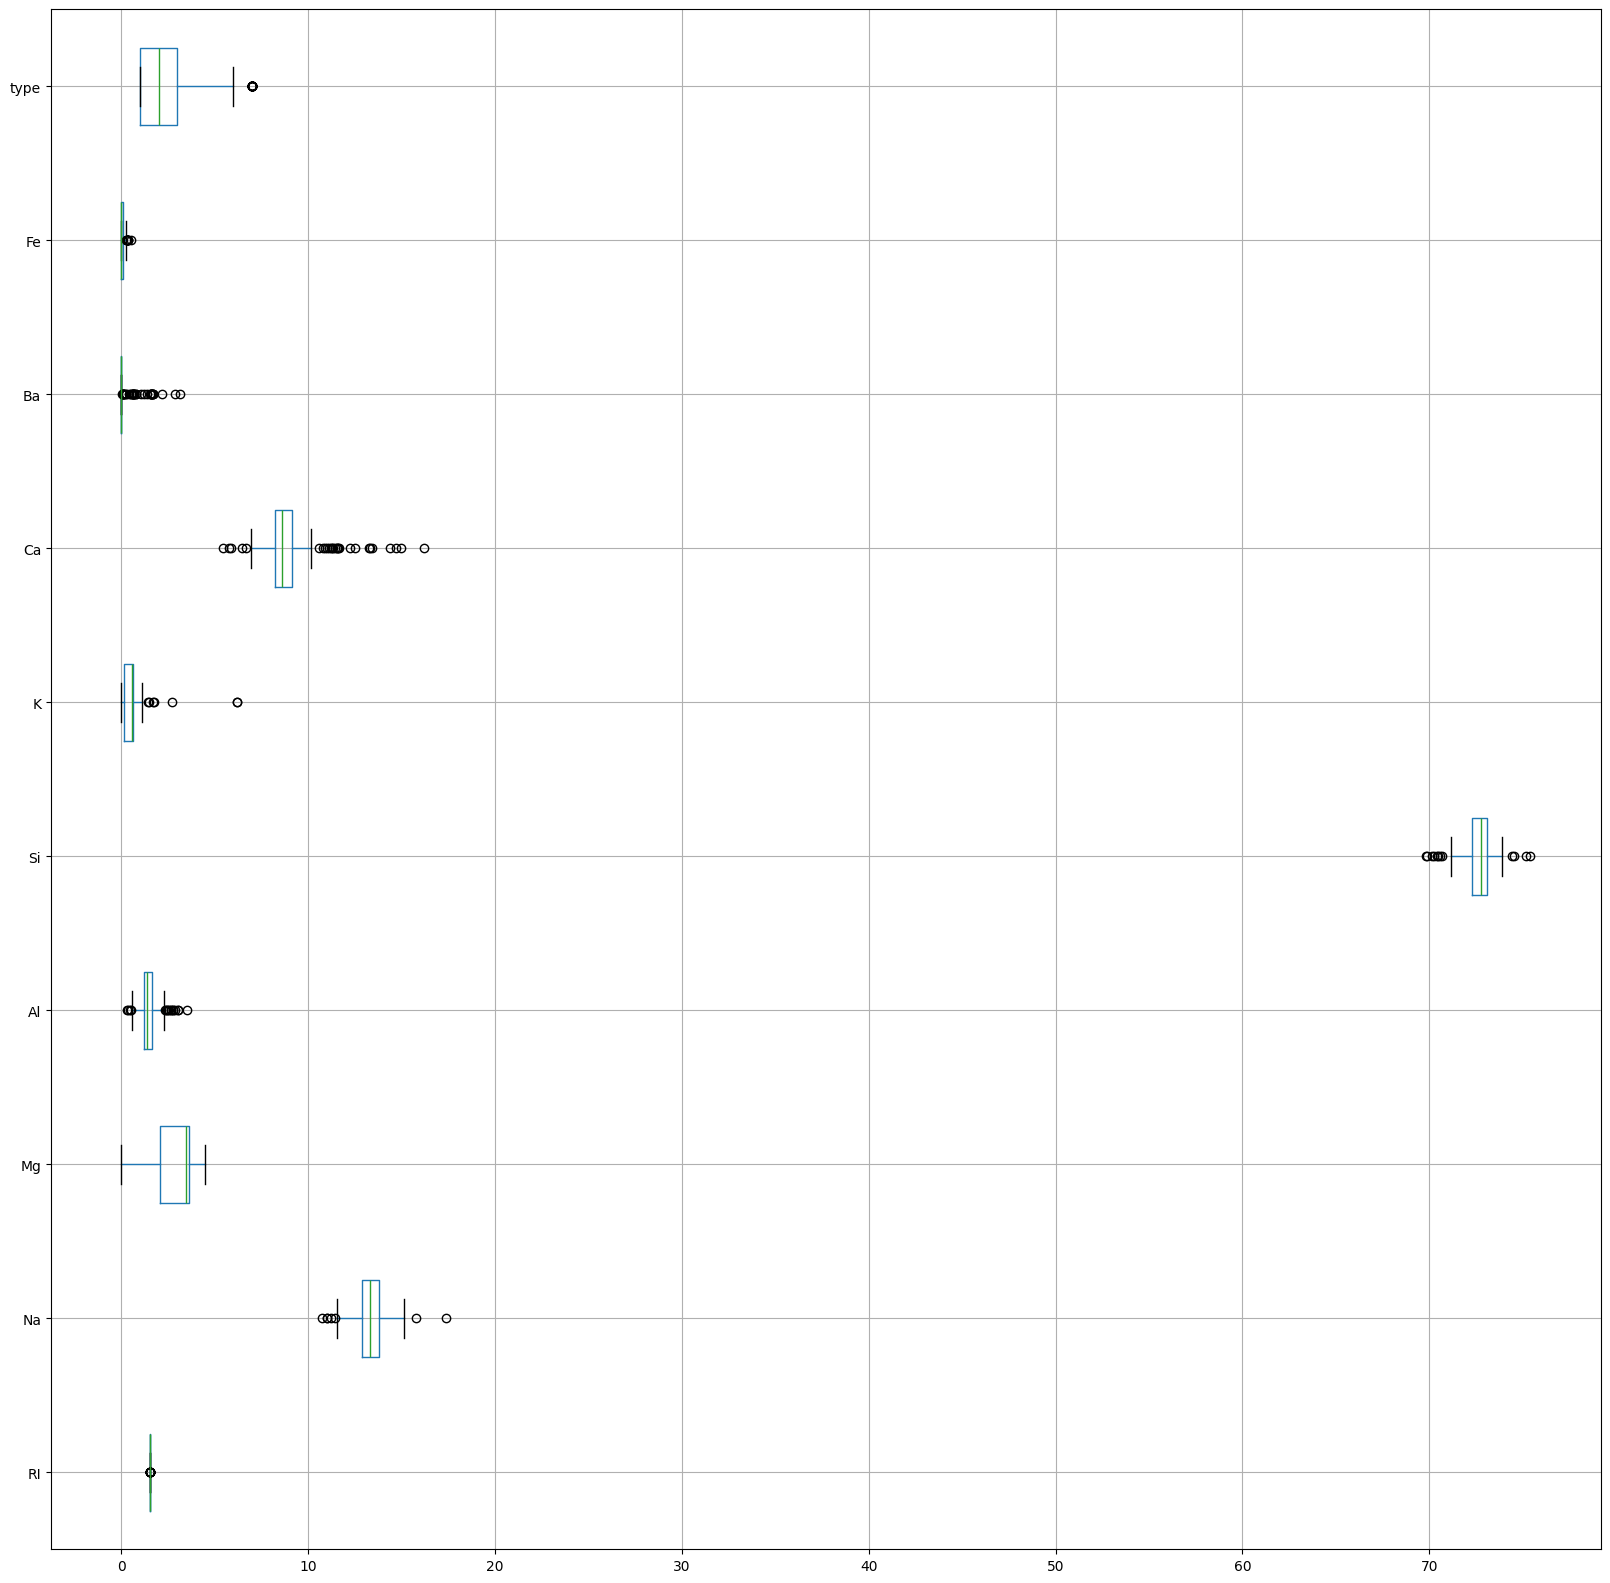

In [27]:
from matplotlib import pyplot as plt


glass.boxplot(vert=False,figsize=(20,20))
plt.show()

Pada boxplot diatas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu lagi penanganan terhadap outlier.

In [28]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [29]:
outliers = dict(check_outlier(glass).sum())

Outlier pada tiap atribut:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
type    29
dtype: int64


Untuk kemudahan implementasi kita berasumsi bahwa *acceptance threshold* untuk outlier yang kita maklumi adalah 17 sehingga kita akan membuang kolom dengan jumlah outlier >= 17

In [30]:
drop_col = [key for key, val in outliers.items() if val >= 17]
drop_col.remove('type')
drop_col

['RI', 'Al', 'Ca', 'Ba']

In [31]:
glass = glass.drop(columns=drop_col)
glass.head()

,Na,Mg,Si,K,Fe,type
0,13.64,4.49,71.78,0.06,0.0,1
1,13.89,3.60,72.73,0.48,0.0,1
2,13.53,3.55,72.99,0.39,0.0,1
3,13.21,3.69,72.61,0.57,0.0,1
4,13.27,3.62,73.08,0.55,0.0,1


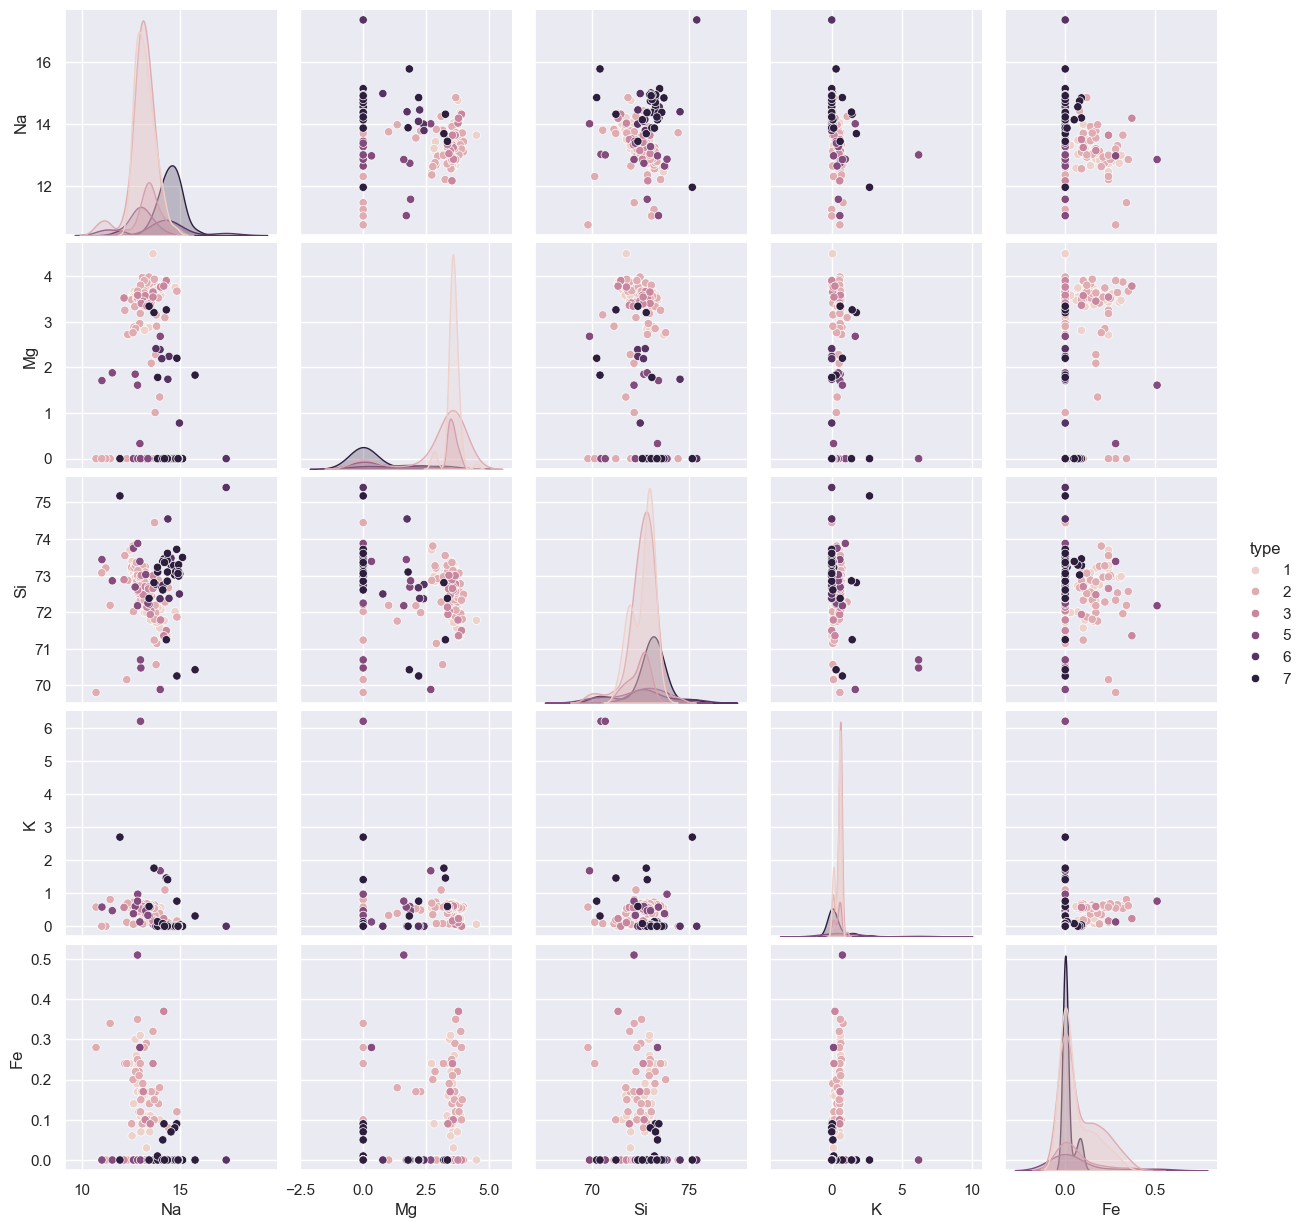

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

cleanData = glass.copy()
sns.pairplot(cleanData,hue ='type')
plt.show()

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan dependent variable dan independent variables

Karena target prediksi kita disini adalah <b>type</b>, maka variable **type** akan menjadi variable dependent dan variable yang lainnya akan menjadi variable independent.

Sebelum menentukan independent variables atau features yang akan kita gunakan pada model, kita akan melakukan feature selection terlebih dahulu untuk memilih variable-variable terbaik. Karena data <b>feature</b> kita bersifat numerik atau kontinuos, dan data target kita kategorik, maka kita akan memilih strategi <b> ANOVA </b> atau analysis of variance dalam melakukan feature selection. Berikut adalah contohnya.

Referensi : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [33]:
X_raw = cleanData.drop(["type"],axis=1)
y     = cleanData["type"]

Kita akan memilih 3 variable terbaik dari independent variable kita untuk dilatih pada model. Berikut adalah contoh code-nya.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=3)
X = selector.fit_transform(X_raw, y)

<i> Note </i> : <br>
Perhatikan, pemilihan feature harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [35]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 3


In [36]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Na', 'Mg', 'K'], dtype=object)

Dari hasil feature selection yang ada kita akan mengambil 4 fitur yaitu `Na`, `Mg`, dan `K`. Selanjutnya, kita akan membagi dataset menjadi testing dan training dengan ukuran yang sama pada proses Naive Bayes. Berikut adalah caranya.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

### Standarization

Sebelum melakukan KNN, kita perlu standarisasi nilai independent variables kita. Hal ini <b>cukup penting</b> dilakukan dalam KNN, karena range nilai yang berbeda-beda dapat mengganggu perhitungan jarak ketika algoritma dijalankan.

Pada tahapan ini, kita akan memilih menggunakan min max scaler saja, berikut adalah caranya.

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Mengatur jumlah neighbor yang digunakan.
N_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

Teman-teman dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. By default, jika tidak ditambahkan, nilai parameter tersebut adalah minkowski.

#### KNN dengan Euclidean Distance

In [40]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [41]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.565060908084164


In [42]:
y_pred = KNN_euclidean.predict(X_test_scaled)
y_pred

array([1, 7, 2, 1, 1, 2, 1, 7, 2, 7, 2, 3, 1, 2, 1, 7, 1, 2, 2, 1, 5, 7,
       1, 3, 2, 3, 2, 6, 1, 2, 2, 5, 1, 7, 2, 3, 1, 2, 1, 1, 2, 1, 1])

In [43]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.56      0.64      0.60        14
           2       0.71      0.67      0.69        15
           3       0.25      0.33      0.29         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         6

    accuracy                           0.60        43
   macro avg       0.53      0.50      0.51        43
weighted avg       0.61      0.60      0.60        43



Confusion Matrix



prediction,1,2,3,5,6,7
actual,,,,,,
1,9,2,3,0,0,0
2,5,10,0,0,0,0
3,2,0,1,0,0,0
5,0,1,0,2,0,0
6,0,0,0,0,0,2
7,0,1,0,0,1,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.6046511627906976
F1 Macro Average: 0.5070060207991242
F1 Micro Average: 0.6046511627906976
Precision Macro Average: 0.5322420634920635
Precision Micro Average: 0.6046511627906976
Recall Macro Average: 0.496031746031746
Recall Micro Average: 0.6046511627906976



#### KNN dengan Manhattan  Distance

In [44]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [45]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6121262458471761


In [46]:
y_pred = KNN_manhattan.predict(X_test_scaled)
y_pred

array([1, 7, 2, 1, 1, 2, 1, 7, 2, 7, 2, 3, 1, 2, 1, 7, 1, 1, 2, 1, 5, 7,
       1, 3, 2, 1, 2, 2, 1, 2, 2, 5, 1, 7, 3, 3, 1, 2, 1, 1, 2, 1, 1])

In [47]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.56      0.71      0.62        14
           2       0.62      0.53      0.57        15
           3       0.25      0.33      0.29         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         6

    accuracy                           0.58        43
   macro avg       0.51      0.49      0.49        43
weighted avg       0.58      0.58      0.57        43



Confusion Matrix



prediction,1,2,3,5,7
actual,,,,,
1,10,2,2,0,0
2,6,8,1,0,0
3,2,0,1,0,0
5,0,1,0,2,0
6,0,0,0,0,2
7,0,2,0,0,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5813953488372093
F1 Macro Average: 0.491468253968254
F1 Micro Average: 0.5813953488372093
Precision Macro Average: 0.5146011396011396
Precision Micro Average: 0.5813953488372093
Recall Macro Average: 0.4857142857142857
Recall Micro Average: 0.5813953488372093



#### KNN dengan Jaccard Distance

In [48]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=4)

In [49]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.3647563676633444


In [50]:
y_pred = KNN_jaccard.predict(X_test_scaled)
y_pred

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1])

In [51]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.38      0.93      0.54        14
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.30        43
   macro avg       0.06      0.15      0.09        43
weighted avg       0.12      0.30      0.18        43



Confusion Matrix



prediction,1,2,6
actual,,,
1,13,0,1
2,15,0,0
3,3,0,0
5,2,1,0
6,0,2,0
7,1,5,0




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.3023255813953488
F1 Macro Average: 0.09027777777777778
F1 Micro Average: 0.3023255813953488
Precision Macro Average: 0.06372549019607843
Precision Micro Average: 0.3023255813953488
Recall Macro Average: 0.15476190476190477
Recall Micro Average: 0.3023255813953488



Berdasarkan hasil evaluasi beberapa model diatas, terlihat pula bahwa model menghasilkan hasil evaluasi yang kurang baik saat menggunakan metric distance Jaccard. Hal tersebut karena Jaccard biasa digunakan untuk menghitung similarity atau dissimilarity di antara fitur-fitur binary/categorical. Oleh karena semua fitur kita sudah dalam bentuk numerik, maka Jaccard kurang baik dalam melakukan perhitungan jarak atribut-atribut tersebut sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik pula.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [52]:
# Optimalisasi KNN dengan gridsearch CV
# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8],'metric': ['euclidean', 'manhattan', 'jaccard']}]

print("Tuning hyper-parameters model KNN")
print()

clfKNN = GridSearchCV(
    model,
    tunned_params,
    scoring="accuracy",
    cv=kfold,
    verbose = 2
)

clfKNN.fit(X_train_scaled, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

Tuning hyper-parameters model KNN

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

prediction,1,2,3,5,7
actual,,,,,
1,13,1,0,0,0
2,8,7,0,0,0
3,1,1,1,0,0
5,0,1,0,2,0
6,0,0,0,0,2
7,0,2,0,0,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.627906976744186
F1 Macro Average: 0.5345679012345679
F1 Micro Average: 0.627906976744186
Precision Macro Average: 0.6401515151515151
Precision Micro Average: 0.627906976744186
Recall Macro Average: 0.5103174603174603
Recall Micro Average: 0.627906976744186




Berdasarkan hasil diatas, kita peroleh bahwa nilai k yang paling optimal adalah 2 dengan metric distance manhattan.

Berdasarkan hasil diatas, model yang kita peroleh sudah optimal karena nilai akurasi diatas 60%. Nilai F1 Micro dan Accuracy kita juga sudah diatas 60%, hal ini menandakan bahwa model kita memiliki nilai false positive dan false negative yang rendah.  

# Latihan Soal

## Latihan Implementasi

Kita akan mencoba membuat model klasifikasi untuk kasus travel insurance, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini.

In [53]:
travel_insurance = pd.read_csv('travel_insurance.csv')
print(f"data berisi {travel_insurance.shape[0]} baris dan {travel_insurance.shape[1]} kolom")
travel_insurance.head(5)

data berisi 22269 baris dan 12 kolom


,ins_id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,45341,28.0,C2B,Airlines,28.13,SINGAPORE,Online,34.0,F,112.50,Silver Plan,1.0
1,12958,37.0,JZI,Airlines,12.95,PHILIPPINES,Online,53.0,F,37.00,Basic Plan,0.0
2,52027,45.0,JZI,Airlines,9.10,HONG KONG,Online,10.0,M,26.00,Basic Plan,0.0
3,24167,32.0,C2B,Airlines,63.21,SINGAPORE,Online,368.0,M,252.85,Annual Silver Plan,1.0
4,19885,59.0,C2B,Airlines,63.21,SINGAPORE,Online,377.0,F,252.85,Annual Silver Plan,0.0


Attribute Information
* ins_id : Unique identifier
* age : insured person age
* agency : The identifier of the insurance agency handling the plan
* agency_type : The type of agency
* commision : Commission amount earned by the agency for selling the product
* destination : The destination where the insured person is traveling to
* distribution_channel : The platform or medium through which the insurance product is sold
* duration : The length of the insurance coverage
* gender : The gender of the insured person
* net_sales : Net sales or revenue generated from selling the insurance product
* product_name : The specific insurance product purchased
* claim : Classification target (1 = Claim, 0 = No Claim)



### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut **claim**. Atribut tersebut terdiri atas nilai 0 atau 1, yang menyatakan apakah klaim asuransi seseorang diterima atau tidak.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### 1a. Preprocessing

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi Anda


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi Anda


* `Cek keberadaan outlier` Anda bebas memilih penanganan outlier apa yang Anda gunakan, bisa dengan membuangnya atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, Anda bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis.


Anda boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib Anda lakukan adalah seperti diatas.

**Catatan**: *Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.*

In [54]:
from numpy import number

travel_insurance = travel_insurance.drop(columns=['ins_id'])

# cek ketiga spesifikasi
check_null(travel_insurance[['commision']])
print("Jumlah duplikasi data : " + str(travel_insurance.duplicated().sum()))
check_outlier(travel_insurance.select_dtypes(include=number))

# handle duplikasi
travel_insurance.drop_duplicates(inplace=True)

# handle outlier
print("INFO OUTLIER")

# AGE
ages = travel_insurance[travel_insurance['age'] >= 88].sort_values(by='age')
print(ages.tail(685))



Tidak ditemukan missing value pada dataset
Jumlah duplikasi data : 8768
Outlier pada tiap atribut:
age           884
commision    3700
duration     4217
net_sales    4010
claim           0
dtype: int64
INFO OUTLIER
         age agency    agency_type  commision destination  \
865     88.0    TST  Travel Agency      10.50    MALAYSIA   
1930    88.0    C2B       Airlines      54.00   SINGAPORE   
19270   88.0    JZI       Airlines      12.95    THAILAND   
16260   88.0    C2B       Airlines       3.75   SINGAPORE   
13468  118.0    JWT       Airlines      12.40       INDIA   
...      ...    ...            ...        ...         ...   
5436   118.0    JWT       Airlines      12.40       INDIA   
5435   118.0    JWT       Airlines      12.40       INDIA   
5415   118.0    JWT       Airlines      12.40       INDIA   
6621   118.0    JWT       Airlines      37.20       INDIA   
22256  118.0    JWT       Airlines      24.00       INDIA   

      distribution_channel  duration gender  net_sal

age: terdapat 681 data yang memiliki umur 118, namun berdasarkan observasi agency, type dan destination, kemungkinan claim asuransi ini dilakukan oleh 1 orang, umur 118 juga bukan umur yang mustahil
fitur age adalah fitur yang menjadi perhatian, sisa dari fitur dari data tidak di drop karena memang fitur-fitur inilah yang akan memberikan informasi yang dibutuhkan untuk memprediksi apakah seseorang akan melakukan claim asuransi atau tidak tidak. terlebih lagi, terlalu banyak data yang hilang jika fitur-fitur tersebut di drop atau outlier dihilangkan.

### 1b. Teoritis

Perhatikan pada dataset travel_insurance:
* Berdasarkan fitur **commision**, jelaskan secara teoritis cara paling baik untuk mengatasi missing value.
* Berdasarkan fitur **net_sales**, jelaskan secara teoritis lebih baik mana menghapus outlier atau mengubah nilainya?

**Wajib menyertakan referensi yang digunakan.**

**Jawaban :**

- Nilai yang tepat untuk mengatasi missing value pada commision adalah rerata K-nearest neighbors (KNN). Karena secara observasi data dan dunia asli, komisi yang didapatkan tentu akan setidaknya berhubungan dengan fitur net_sales dimana semakin besar sales yang didapati dengan menjual suatu produk asuransi, maka komisi yang didapatkan juga akan semakin besar. Karena ini, fitur ini berkorelasi dengan variabel lain. Oleh karena itu, KNN dapat digunakan untuk mengisi missing value pada commision dengan melihat data-data yang memiliki karakteristik yang mirip dengan data yang missing value. sebenarnya banyak metode lain yang bisa digunakan untuk mengatasi fitur yang berkorelasi kuat dengan fitur lain seperti regresi, namun knn dipilih karena lebih sederhana dan efisien dalam konteks imputasi data
- Pada fitur net_sales, lebih baik mengubah nilai outlier karena jika outlier dihapus, data yang hilang akan sangat banyak dan akan mengurangi akurasi model. Selain itu, jika outlier diubah, data yang hilang akan diubah menjadi data yang masih dapat digunakan.

> <b><i>Referensi</i></b> : <br>
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

### 2a. Persiapan Training

Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus Anda lakukan :
* `Lakukan encoding terhadap fitur-fitur yang masih dalam bentuk kategorikal`. Anda dapat melakukan encoding dengan menggunakan library encoder apapun yang menurut Anda terbaik.

* `memilih dependent dan juga independent variables` Anda diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan Anda. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut Anda. Jangan lupa untuk menjelaskan asumsi yang Anda ambil. ( <i> Hint </i> : Silakan eksplorasi pengambilan fitur dari jumlah kecil ke jumlah besar)


* `membagi dataset menjadi training dan testing` . Membagi dataset menjadi training dan testing dengan ketentuan :
  - training : 65%
  - testing : 35%
  - random state = 2025



* `lakukan standarisasi` Anda bebas memilih standarisasi apa yang menurut Anda merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa Anda menggunakan strategi tersebut. (<i>Hint</i> : perhatikan method yang digunakan saat standarisasi, jangan sampai keliru ketika melakukan standarisasi training dan testing).

**Catatan**: *Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.*

In [55]:
# feature selection
from sklearn.calibration import LabelEncoder

ti = travel_insurance

# Encoding
encoder = LabelEncoder()
ti['agency'] = encoder.fit_transform(ti['agency'])
ti['product_name'] = encoder.fit_transform(ti['product_name'])
ti['destination'] = encoder.fit_transform(ti['destination'])

ti = pd.get_dummies(ti, drop_first=True)

# Variabel independen
x = pd.get_dummies(ti.drop(["claim"], axis=1), drop_first=True)

# Variabel dependen yaitu varaibel target
y = ti["claim"]


# feature selection
feat_sel = []
for i in range(1, len(x.columns) + 1):
    selector = SelectKBest(f_classif, k=i)
    x_new = selector.fit_transform(x, ti["claim"])

    if selector.pvalues_.min() < 0.05:
        feat_sel.append((i, x_new))

    input_features = selector.feature_names_in_

    # display best features for each iteration
    # display(selector.get_feature_names_out(input_features=input_features))

# split data
x_trains = []
y_trains = []
x_tests = []
y_tests = []
for i, x in feat_sel:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, stratify=y, random_state = 2025)

    scaler = MinMaxScaler()

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_trains.append(x_train)
    y_trains.append(y_train)
    x_tests.append(x_test)
    y_tests.append(y_test)


### 2b. Teoritis

Perhatikan pada dataset travel_insurance terdapat fitur **agency_type**, **destination** dan **product_name** yang merupakan fitur kategorikal.
* Apa perbedaan antara penggunaan Label Encoder dan One-Hot Encoding untuk fitur-fitur tersebut? dan metode encoding mana yang lebih baik? jelaskan per fitur.

**Wajib menyertakan referensi yang digunakan.**

**Jawaban :**

Jika kita melihat jumlah nilai yang unik pada setiap fitur kategorikal:

In [56]:
print(travel_insurance.select_dtypes(exclude=number).columns)
columns = ['agency', 'agency_type', 'destination', 'distribution_channel', 'gender', 'product_name']
for column in columns:
    print(f"Unique {column} = {travel_insurance[column].nunique()}")

Index(['agency_type', 'distribution_channel', 'gender'], dtype='object')
Unique agency = 14
Unique agency_type = 2
Unique destination = 68
Unique distribution_channel = 2
Unique gender = 2
Unique product_name = 21


Terdapat beberapa fitur yang memiliki nilai unik seperti agency, destination,dan product_name. Jika kita menggunakan one hot encoding, maka akan terlalu banyak kolom yang dihasilkan, sehingga akan mempengaruhi performa model dan waktu komputasi. Oleh karena itu, lebih baik menggunakan label encoding pada fitur-fitur tersebut. sebaliknya, jika fitur tersebut memiliki nilai unik yang sedikit, lebih baik menggunakan one hot encoding.

> <b><i>Referensi</i></b> : <br>
- https://www.statology.org/label-encoding-vs-one-hot-encoding/

### 3a. Implementasi Naive Bayes

Pada tahapan ini, Anda diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (**berikan alasan yang sesuai**).

***Tips***: <br>Ingat bahwa model kita ingin memprediksi apakah klaim asuransi dapat diterima atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Positive. Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

<b><i> Hint </i></b> : <br>
Liat distribusi nilai dari setiap feature yang telah Anda pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, Anda bisa menentukan model apa yang optimal.


**Catatan:**
*Anda diperbolehkan menggunakan atau menambahkan cell dengan tipe markdown untuk memberikan komentar atau catatan.*

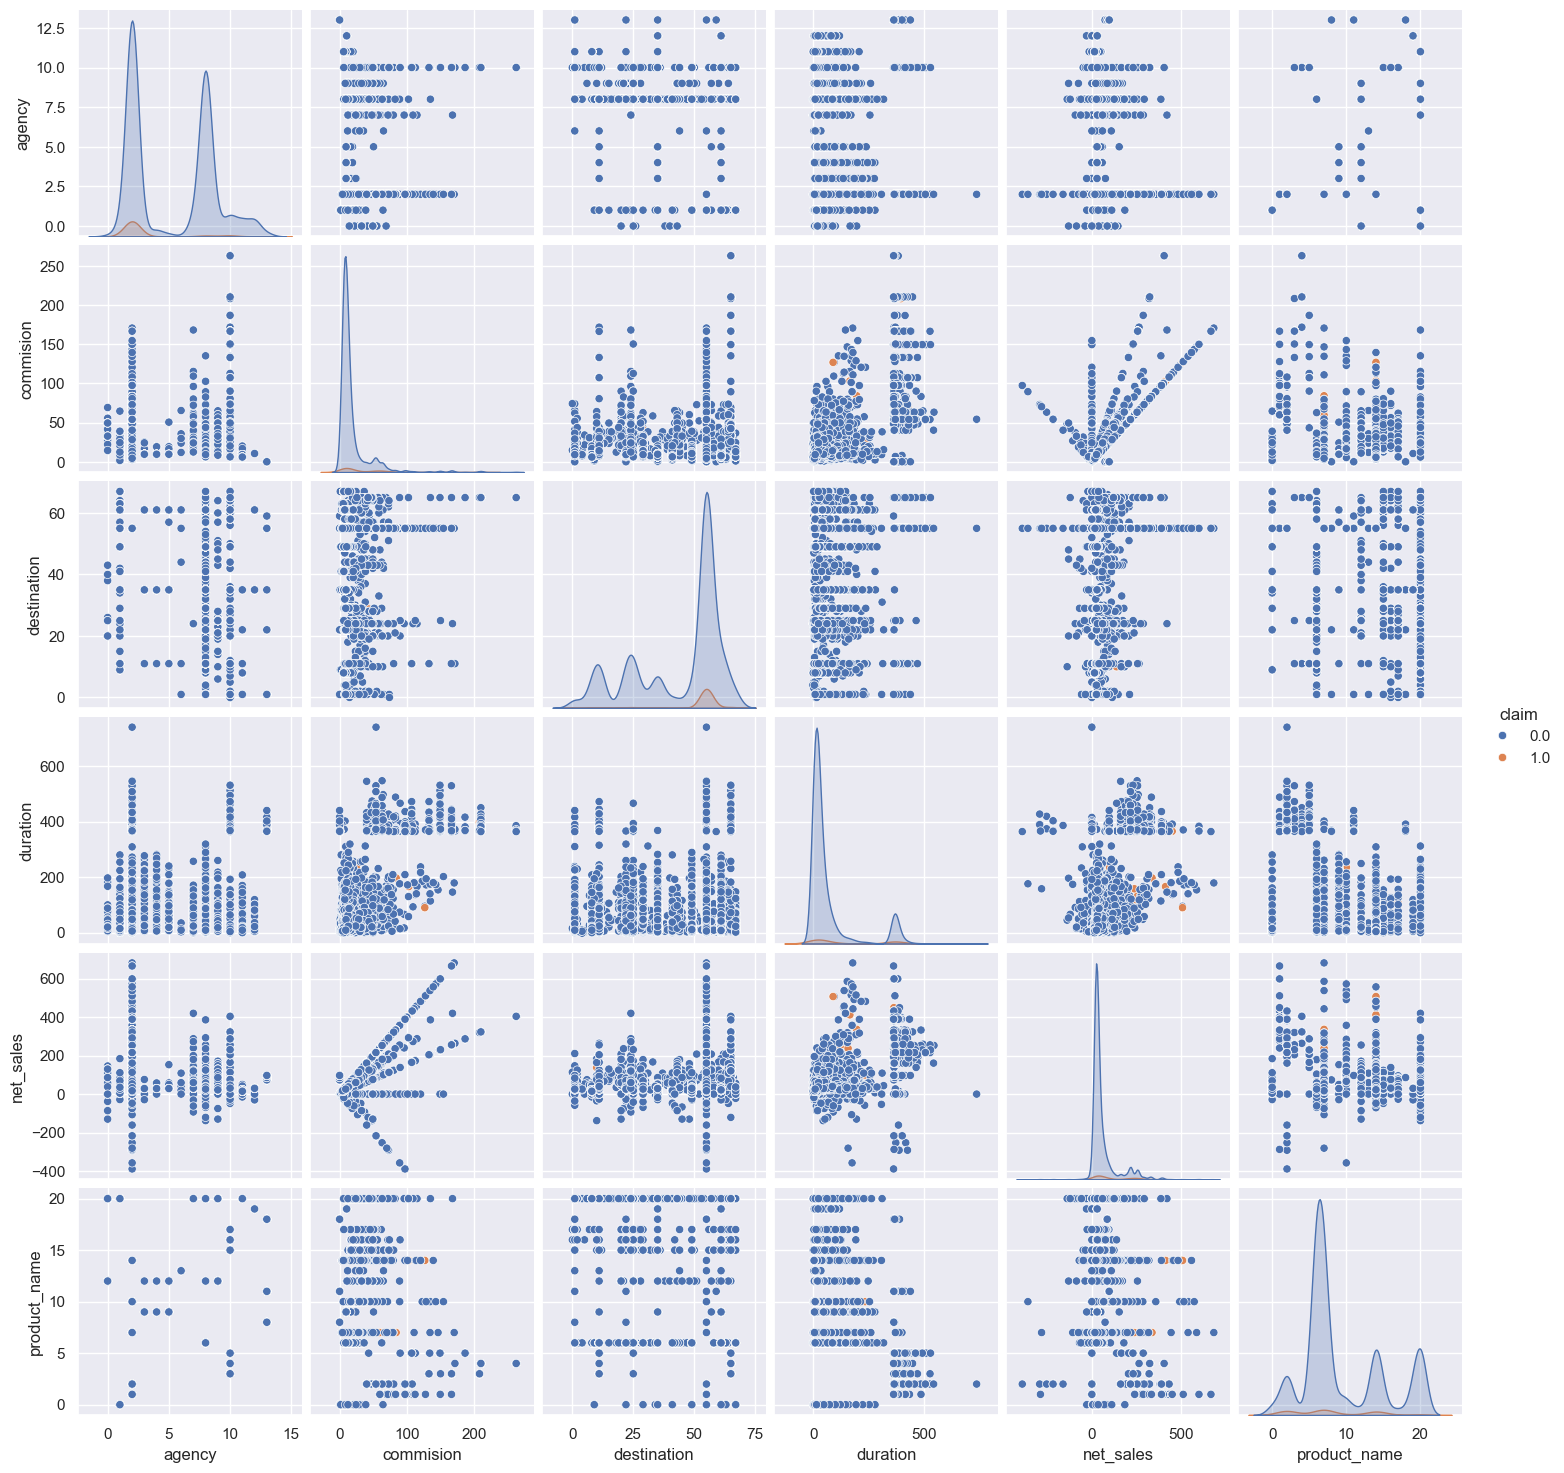

In [57]:
sns.pairplot(travel_insurance[['agency', 'commision', 'destination', 'duration', 'net_sales','product_name', 'claim']], hue ='claim')
plt.show()

Terlihat bahwa data terdistribusi secara normal oleh karena itu, naive bayes Gaussian adalah model yang paling cocok untuk digunakan.

In [58]:
for i, (x_train, y_train, x_test, y_test) in enumerate(zip(x_trains, y_trains, x_tests, y_tests)):
    # print(feat_sel[i][0], "Feature")
    nbg = GaussianNB()
    nbg.fit(x_train, y_train)

    y_pred = nbg.predict(x_test)
    #evaluate_classifier_performance(y_pred, y_test)

x_train, x_test, y_train, y_test = x_trains[4], x_tests[4], y_trains[4], y_tests[4]

### 3b. Teoritis

Perhatikan pada dataset travel_insurance:
* Bagaimana performa model Naive Bayes yang sudah Anda implementasikan?
* Ada kemungkinan beberapa fitur dalam dataset yang saling berkorelasi, seperti commision dan net_sales, apakah hal tersebut memengaruhi performa model Naive Bayes? Jelaskan dengan lengkap.

**Wajib menyertakan referensi yang digunakan.**


**Jawaban :**

- Peningkatan performa model berhenti meningkat ketika fitur berjumlah 5, hal ini menunjukkan bahwa 5 fitur adalah jumlah fitur yang optimal untuk model. Data yang diberikan tidak seimbang, klaim asuransi lebih banyak ditolak daripada diterima. Oleh karena itu, model sudah bisa memprediksi apakah klaim asuransi ditolak namun masih buruk dalam memprediksi klaim asuransi yang diterima. Hal ini disebabkan oleh data yang tidak seimbang. Oleh karena itu, model yang dihasilkan masih belum optimal. Model Naive Bayes belum bisa mengurangi jumlah False Positif pada keseluruhan data.
- Menurut Teori, naive bayes mengasumsikan bahwa fitur-fitur yang ada adalah independen karena naive bayes menggunakan teori probabilitas statistika dimana semua variabel disederhanakan dan diasumsikan independen. Jika fitur-fitur tersebut berkorelasi, maka asumsi ini tidak terpenuhi dan model yang dihasilkan tidak akan optimal. Namun, naive bayes masih bisa digunakan pada data yang berkorelasi, namun performa model yang dihasilkan tidak akan optimal.

> <b><i>Referensi</i></b> : <br>
- https://www.ibm.com/topics/naive-bayes
- https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

### 4a. Implementasi KNN

Setelah mencoba model naive bayes, Anda diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN.

Berikut adalah langkah-langkah umum yang dapat Anda ikuti:
* Pilih nilai K yang terbaik menurut Anda dan lakukan analisis berdasarkan temukan Anda. Mulai dengan mengambil nilai K secara random terlebih dahulu pada percobaan pertama, lalu kemudian perbaiki dengan parameter tuning. Anda juga boleh mencoba untuk tuning parameter yang lain (tetapi tidak diwajibkan).
* Lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Anda dapat menggunakan algoritma cross_validation yang sesuai menurut Anda sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya.
* Cantumkan hasil evaluasi cross validationnya. Setelah itu, Berikan pula hasil evaluasi model dan berikan analisis Anda. Jika model kurang optimal, berikan saran perbaikan yang sesuai. Pilih juga parameter `metric` distance yang sesuai menurut Anda sesuai dengan karakteristik data yang diberikan.

***Tips***: Ingat bahwa model kita ingin memprediksi apakah klaim asuransi dapat diterima atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Positive. Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

**Catatan:**
*Anda diperbolehkan menggunakan atau menambahkan cell dengan tipe markdown untuk memberikan komentar atau catatan.*

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

selector_ti = SelectKBest(f_classif, k=5)
x = selector_ti.fit_transform(x, y)

# Initialize KNN with a random K value
k_initial = 5
knn = KNeighborsClassifier(n_neighbors=k_initial)

# Perform cross-validation using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
scores_skf = cross_val_score(knn, x, y, cv=skf, scoring='accuracy')


# Print the mean accuracy score
print(f"Initial K={k_initial}, Mean Cross-Validation Accuracy: {np.mean(scores_skf)}")

from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8],'metric': ['euclidean', 'manhattan', 'jaccard']}]

print("Tuning hyper-parameters model KNN")
print()

clfKNN = GridSearchCV(
    model,
    tunned_params,
    scoring="accuracy",
    cv=skf,
    verbose = 0
)

clfKNN.fit(x_train, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
y_ti_true, y_ti_pred = y_test, clfKNN.predict(x_test)
evaluate_classifier_performance(y_ti_pred, y_ti_true)
print()

params = clfKNN.best_params_
knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], metric=params['metric'])
knn.fit(x_train, y_train)

# Perform cross-validation using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
scores_skf = cross_val_score(knn, x_train, y_train, cv=skf, scoring='accuracy')


# Print the mean accuracy score
print(f"Initial K=1, Mean Cross-Validation Accuracy: {np.mean(scores_skf)}")

Initial K=5, Mean Cross-Validation Accuracy: 0.9411152796632247
Tuning hyper-parameters model KNN


Best parameters set found on development set:
{'metric': 'jaccard', 'n_neighbors': 1}

Detailed classification report:
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      4507
         1.0       0.00      0.00      0.00       219

    accuracy                           0.95      4726
   macro avg       0.48      0.50      0.49      4726
weighted avg       0.91      0.95      0.93      4726



Confusion Matrix



prediction,0.0
actual,
0.0,4507
1.0,219




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9536606009310199
F1 Macro Average: 0.4881403660781978
F1 Micro Average: 0.9536606009310199
Precision Macro Average: 0.47683030046550995
Precision Micro Average: 0.9536606009310199
Recall Macro Average: 0.5
Recall Micro Average: 0.9536606009310199


Initial K=1, Mean Cross-Validation Accuracy: 0.9536182336182335


Secara keseluruhan model sudah cukup baik, akurasi model meningkat dari sebelumnya

### 4b. Teoritis

Pada dataset travel_insurance:

* Jelaskan konsep curse of dimensionality dan bagaimana hal tersebut dapat memengaruhi performa KNN pada dataset travel_insurance ?
* Jelaskan mengapa KNN menjadi kurang efektif seiring dengan meningkatnya jumlah fitur.

**Wajib menyertakan referensi yang digunakan.**

**Jawaban :**

- Dalam bahasa informal, kutukan dimensionality adalah fenomena dimana semakin banyak fitur yang dimiliki data, maka semakin buruk performa model. pada kasus ini, proses encoding menambah jumlah kolom numerik yang ada pada data, sehingga perlu dilakukan feature selection. Curse of dimensionality menyebabkan model menjadi overfitting, dimana model terlalu memperhatikan data training dan tidak bisa melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Oleh karena itu, model yang dihasilkan tidak optimal.
- KNN menjadi kurang efektif seiring dengan meningkatnya jumlah fitur karena jumlah fitur membingungkan untuk model. Ibarat dalam mengambil keputusan kita mempertimbangkan semakin banyak dam semakin banyak hal, maka akan semakin buruk keputusan yang diambil. Bisa jadi sebagian besar hal yang kita pertimbangkan itu tidak relevan dengan keputusan yang diambil. Oleh karena itu, semakin banyak fitur yang dimiliki data, maka semakin buruk performa model.

> <b><i>Referensi</i></b> : <br>
- https://www.geeksforgeeks.org/k-nearest-neighbors-and-curse-of-dimensionality/

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Naive Bayes dan KNN](https://www.kaggle.com/t/1b62fa97f7494417862f9f9224cb47a0)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [80]:
train = pd.read_csv('recruitment_train.csv')
tests = pd.read_csv('recruitment_test.csv')

train.drop(['ID'], axis=1, inplace=True)


In [81]:
display(train.isna().sum())
display(tests.duplicated().sum())

age                      1
gender                   0
education_level          1
experience_years         1
previous_companies       0
distance_from_company    0
interview_score          1
skill_score              1
personality_score        1
recruitment_strategy     1
hiring_decision          0
dtype: int64

0

In [82]:
train.dropna(inplace=True)

check_outlier(train.select_dtypes(include=number))

Outlier pada tiap atribut:
age                      0
experience_years         0
previous_companies       0
distance_from_company    0
interview_score          0
skill_score              0
personality_score        0
hiring_decision          0
dtype: int64


,age,experience_years,previous_companies,distance_from_company,interview_score,skill_score,personality_score,hiring_decision
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1270,False,False,False,False,False,False,False,False
1271,False,False,False,False,False,False,False,False
1272,False,False,False,False,False,False,False,False
1273,False,False,False,False,False,False,False,False


In [83]:
# check for imbalance

for col in train.select_dtypes(exclude=number).columns:
    print('No. of unique values in column '+col+':')
    print(train[col].value_counts(),'\n')

No. of unique values in column gender:
gender
Male      649
Female    619
Name: count, dtype: int64 

No. of unique values in column education_level:
education_level
Bachelor's (Type 2)    630
Master's               273
Bachelor's (Type 1)    251
PhD                    114
Name: count, dtype: int64 

No. of unique values in column recruitment_strategy:
recruitment_strategy
Moderate        645
Aggressive      384
Conservative    239
Name: count, dtype: int64 



In [84]:
# encoding
encoder = LabelEncoder()
train['gender'] = encoder.fit_transform(train['gender'])
tests['gender'] = encoder.transform(tests['gender'])

train['education_level'] = encoder.fit_transform(train['education_level'])
tests['education_level'] = encoder.transform(tests['education_level'])

train['recruitment_strategy'] = encoder.fit_transform(train['recruitment_strategy'])
tests['recruitment_strategy'] = encoder.transform(tests['recruitment_strategy'])

edu_mean = train.groupby('education_level')['hiring_decision'].mean()
rec_mean = train.groupby('recruitment_strategy')['hiring_decision'].mean()

train['education_level'] = train['education_level'].map(edu_mean)
train['recruitment_strategy'] = train['recruitment_strategy'].map(rec_mean)

tests['education_level'] = tests['education_level'].map(edu_mean)
tests['recruitment_strategy'] = tests['recruitment_strategy'].map(rec_mean)

In [85]:
# train
scaler = MinMaxScaler()

x_train = scaler.fit_transform(train.drop('hiring_decision', axis=1))
x_test = scaler.transform(tests.drop('ID', axis=1))
y_train = train['hiring_decision']

display(x_train)
display(x_test)

array([[0.63333333, 1.        , 0.72192459, ..., 0.04      , 0.03      ,
        0.01157372],
       [0.46666667, 1.        , 0.02308968, ..., 0.32      , 0.54      ,
        0.01157372],
       [0.9       , 1.        , 0.02308968, ..., 0.21      , 0.58      ,
        1.        ],
       ...,
       [0.13333333, 0.        , 0.02308968, ..., 0.3       , 0.79      ,
        0.01157372],
       [0.4       , 1.        , 0.72192459, ..., 0.66      , 0.49      ,
        0.01157372],
       [0.76666667, 1.        , 0.02308968, ..., 0.38      , 0.14      ,
        0.01157372]])

array([[0.06666667, 1.        , 0.02308968, ..., 0.41      , 0.34      ,
        0.01157372],
       [0.06666667, 1.        , 0.        , ..., 0.7       , 0.93      ,
        0.        ],
       [0.06666667, 1.        , 0.        , ..., 0.69      , 0.86      ,
        1.        ],
       ...,
       [0.46666667, 0.        , 0.        , ..., 0.81      , 0.34      ,
        1.        ],
       [0.23333333, 1.        , 0.        , ..., 0.97      , 0.49      ,
        0.01157372],
       [0.16666667, 0.        , 0.02308968, ..., 0.78      , 0.64      ,
        0.01157372]])

In [86]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
import numpy as np

selector_ti = SelectKBest(f_classif, k=6)
x_train = selector_ti.fit_transform(x_train, y_train)

columns = selector_ti.get_support(indices=True)
x_test = x_test[:, columns]

# Initialize KNN with a random K value
k_initial = 5
knn = KNeighborsClassifier(n_neighbors=k_initial)

# Perform cross-validation using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
scores_skf = cross_val_score(knn, x_train, y_train, cv=skf, scoring='accuracy')


# Print the mean accuracy score
print(f"Initial K={k_initial}, Mean Cross-Validation Accuracy: {np.mean(scores_skf)}")

model = KNeighborsClassifier()
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12], 'metric': ['euclidean', 'manhattan', 'jaccard']}]

print("Tuning hyper-parameters model KNN")
print()

clfKNN = RandomizedSearchCV(
    model,
    tunned_params,
    scoring="accuracy",
    cv=skf,
    verbose = 0
)

clfKNN.fit(x_train, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)

params = clfKNN.best_params_
knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], metric=params['metric'])
knn.fit(x_train, y_train)

# Perform cross-validation using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
scores_skf = cross_val_score(knn, x_train, y_train, cv=skf, scoring='accuracy')


# Print the mean accuracy score
print(f"Initial K={params['n_neighbors']}, Mean Cross-Validation Accuracy: {np.mean(scores_skf)}")

Initial K=5, Mean Cross-Validation Accuracy: 0.9148174659985683
Tuning hyper-parameters model KNN


Best parameters set found on development set:
{'n_neighbors': 5, 'metric': 'manhattan'}
Initial K=5, Mean Cross-Validation Accuracy: 0.9171890075005447


In [87]:
y_pred = knn.predict(x_test)

sub = pd.DataFrame()
sub['ID'] = tests['ID']
sub['hiring_decision'] = y_pred
sub.to_csv('submit.csv', index=False)

In [88]:
nb = GaussianNB() # For numeric
nb.fit(x_train, y_train)

GaussianNB()

In [89]:
# Perform cross-validation using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
scores_skf = cross_val_score(nb, x_train, y_train, cv=skf, scoring='accuracy')

y_pred = nb.predict(x_test)

sub = pd.DataFrame()
sub['ID'] = tests['ID']
sub['hiring_decision'] = y_pred
sub.to_csv('submit_nb.csv', index=False)

# ----Selesai----